<a href="https://colab.research.google.com/github/Ratnasari124/Mechine_Learning_Ratnasari/blob/main/Ratnasari_2241720007_Mesin_Learning__JS_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**JOBSHEET 09 MECHINE LEARNING**

***Neural Network dan Deep Learning***

---



Nama : Ratnasari

NIM : 2241720007

Kelas : TI 3D

Absen : 25

---



Link Jobsheet : https://polinema.gitbook.io/jti-modul-praktikum-pembelajaran-mesin/neural-network-dan-deep-learning/job-sheet-9-perceptron-dan-ann

Link Github :

# **PRAKTIKUM 1**

---

Klasifikasi Iris dengan Perceptron

In [56]:
pip install --upgrade scikit-learn


In [3]:
#upload file
from google.colab import files
uploaded = files.upload()

Saving Iris (1).csv to Iris (1).csv


Langkah 1 - Import Library

---



In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Langkah 2 - Load Data dan Visualisasi

---



In [58]:
print(df.head())  # Tampilkan 5 baris pertama untuk memeriksa data
print(df[[0, 3]].describe())  # Statistik deskriptif untuk kolom 0 dan 3


    0              1             2              3             4            5
0  Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
1   1            5.1           3.5            1.4           0.2  Iris-setosa
2   2            4.9           3.0            1.4           0.2  Iris-setosa
3   3            4.7           3.2            1.3           0.2  Iris-setosa
4   4            4.6           3.1            1.5           0.2  Iris-setosa
          0    3
count   151  151
unique  151   44
top      Id  1.5
freq      1   14


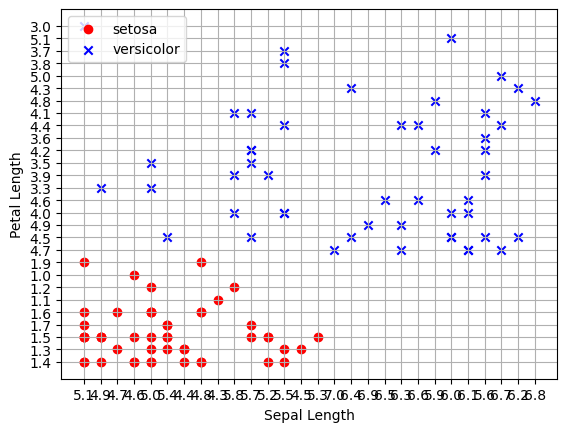

<Figure size 640x480 with 0 Axes>

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
df = pd.read_csv('Iris (1).csv', header=None)

# Memisahkan spesies iris
# DIGANTI 5 YG DIBACA KOLOM 5 BUKAN 4
setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']

# Memilih kolom yang sesuai
a, b = 1, 3  # Sepal Length dan Petal Length

# Plotting
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')
# Label sumbu
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Menambahkan legend dan grid
plt.legend(loc='upper left')
plt.grid()

# Menampilkan plot
plt.show()

# Simpan gambar jika visualisasi tetap tidak muncul
plt.savefig('scatter_plot.png')


Langkah 3 - Membuat Kelas Perceptron

---



In [76]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta  # Tingkat pembelajaran
        self.n_iter = n_iter  # Jumlah iterasi

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # Inisialisasi bobot (bobot dan bias)
        self.errors_ = []  # List untuk menyimpan jumlah kelasifikasi yang salah pada setiap iterasi

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))  # Menghitung perubahan bobot
                self.w_[0] += update  # Memperbarui bias (w[0])
                self.w_[1:] += update * xi  # Memperbarui bobot (w[1:] atau bobot fitur)
                errors += int(update != 0.0)  # Menghitung jumlah kelasifikasi yang salah
            self.errors_.append(errors)  # Menyimpan jumlah kelasifikasi yang salah pada iterasi ini
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]  # Menghitung masukan bersih (kombinasi linear dari bobot dan fitur)

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)  # Membuat prediksi (1 jika masukan bersih >= 0, -1 sebaliknya)

Langkah 4 - Pilih Data dan Encoding Label

---



In [78]:
# Persiapan Data
y = df.iloc[1:100, 5].values  # Ambil label
y = np.where(y == 'Iris-setosa', -1, 1)  # Ganti coding label
X = df.iloc[1:100, [1, 3]].values  # Ambil fitur
X = X.astype(float)

# Pastikan X adalah array NumPy
X = np.array(X)
y = np.array(y)

Langkah 5 - Fitting Model

---



In [79]:
# Membuat instance objek Perceptron dengan tingkat pembelajaran (learning rate) 0.1
# dan jumlah iterasi pelatihan sebanyak 10 kali
ppn = Perceptron(eta=0.1, n_iter=10)

# Melatih model Perceptron (ppn) dengan data X dan target y
ppn.fit(X, y)

Langkah 6 - Visualisasi Nilai Error Per Epoch

---



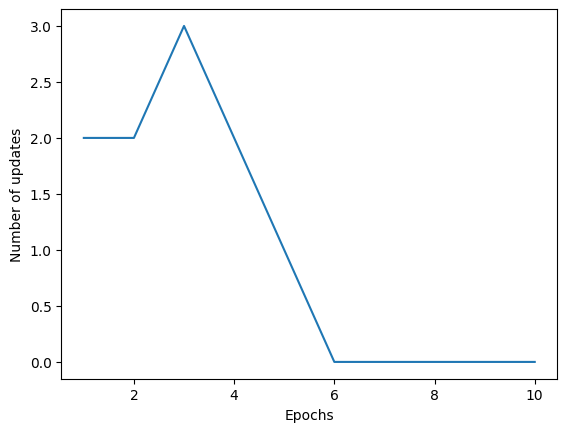

In [80]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Langkah 7 - Visualiasasi Decision Boundary

---



In [81]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

<ipython-input-81-a58a4a863c9c>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


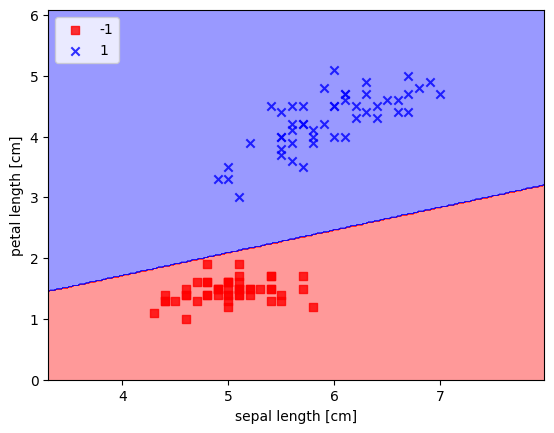

In [82]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# **PRAKTIKUM 2**

---


Klasifikasi Berita dengan Perceptron

Langkah 1 - Import Library

---



In [65]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report


In [53]:
pip install --upgrade scikit-learn


Langkah 2 - Pilih Label dan Split Data

---



In [66]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

---



In [67]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)  # Tetap menggunakan random_state
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



# **PRAKTIKUM 3**

---
Nilai Logika XOR dengan MLP


Langkah 1 - Import Library

---



In [68]:
from sklearn.neural_network import MLPClassifier

Langah 2 - Buat Data

---



In [69]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

Langkah 3 - Fit Model

---



In [70]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

Langkah 4 - Prediksi

---



In [71]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# **PRAKTIKUM 4**

---

Klasifikasi dengan ANN

##**Pra Pengolahan Data**

In [83]:
#upload file
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


Langkah 1 - Import Library

---



In [84]:
import numpy as np
import pandas as pd
import tensorflow as tf

Langkah 2 - Load Data

---



In [85]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [87]:
# Cek data(X)
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


Langkah 3 - Encoding Data Kategorikal

---



In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [90]:
#cek data
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

---



In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Langkah 5 - Split Data

---



In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Langkah 6 - Scaling Fitur

---



In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Membuat Model ANN**

Langkah 1 - Inisiasi Model ANN

---



In [94]:
ann = tf.keras.models.Sequential()

Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

---



In [95]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Langkah 3 - Membuat Hidden Layer Kedua

---



In [96]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Langkah 4 - Membuat Output Layer

---



In [97]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## **Training Model**

Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

---



In [98]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Langkah 2 - Fitting Model

---



In [99]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7233 - loss: 0.6066
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.4723
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7919 - loss: 0.4488
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8013 - loss: 0.4354
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8065 - loss: 0.4324
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8115 - loss: 0.4269
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8155 - loss: 0.4155
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8147 - loss: 0.4185
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8159 - loss: 0.4208
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8132 - loss: 0.4191
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8282 - loss: 0.4040
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## **Membuat Prediksi**

Diberikan informasi sebagai berikut,

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

Modelkan Data Baru dan Buat Prediksi

---



In [100]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[False]]


Prediksi Dengan Data Testing

---



In [101]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Cek Akurasi dan Confusion Matrix

---



In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1515   80]
 [ 203  202]]


0.8585